In [ ]:
#SVR

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Generate training data for the 1D function f(x) = x^2 with noise, excluding the range -0.5 ≤ x ≤ 0.5
X_train_1d = np.concatenate([np.linspace(-1, -0.5, 50), np.linspace(0.5, 1, 50)]).reshape(-1, 1)
y_train_1d = X_train_1d ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_1d), 1)
y_train_1d_with_noise = y_train_1d + noise_train

# Generate test data for the same function (within the range -0.5 ≤ x ≤ 0.5) with noise
X_test_1d = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_test_1d = X_test_1d ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_1d), 1)
y_test_1d_with_noise = y_test_1d + noise_test

# Create and fit an SVR model with hyperparameter tuning
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(X_train_1d, y_train_1d_with_noise.ravel())  # Use noisy training data

# Predict using SVR
y_pred_svr = svr_model.predict(X_test_1d)

# Calculate MSE
mse_svr = mean_squared_error(y_test_1d_with_noise, y_pred_svr)
print("MSE for SVR with noisy data:", mse_svr)

# Plot the noisy training and testing data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_1d, y_train_1d_with_noise, label='Noisy Training Data', color='blue')
plt.scatter(X_test_1d, y_test_1d_with_noise, label='Noisy Testing Data', color='red')
plt.plot(X_test_1d, y_pred_svr, label='SVR Prediction', color='green')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Noisy Training Data, Noisy Testing Data, and SVR Prediction for f(x) = x^2')
plt.axvline(x=-0.5, color='gray', linestyle='--', label='Range -0.5 to 0.5')
plt.axvline(x=0.5, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


MSE for SVR with noisy data: 0.014036616899996199


In [ ]:
#improved SVR

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Generate training data for the 1D function f(x) = x^2 with noise, excluding the range -0.5 ≤ x ≤ 0.5
X_train_1d = np.concatenate([np.linspace(-1, -0.5, 50), np.linspace(0.5, 1, 50)]).reshape(-1, 1)
y_train_1d = X_train_1d ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_1d), 1)
y_train_1d_with_noise = y_train_1d + noise_train

# Generate test data for the same function (within the range -0.5 ≤ x ≤ 0.5) with noise
X_test_1d = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_test_1d = X_test_1d ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_1d), 1)
y_test_1d_with_noise = y_test_1d + noise_test

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create and fit an SVR model with hyperparameter tuning
svr_model = SVR(kernel='rbf')
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train_1d, y_train_1d_with_noise.ravel())  # Use noisy training data

# Get the best model from the grid search
best_svr = grid_search.best_estimator_

# Predict using the best SVR model
y_pred_svr = best_svr.predict(X_test_1d)

# Calculate MSE
mse_svr = mean_squared_error(y_test_1d_with_noise, y_pred_svr)
print("MSE for SVR with noisy data:", mse_svr)

# Plot the noisy training and testing data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_1d, y_train_1d_with_noise, label='Noisy Training Data', color='blue')
plt.scatter(X_test_1d, y_test_1d_with_noise, label='Noisy Testing Data', color='red')
plt.plot(X_test_1d, y_pred_svr, label='SVR Prediction', color='green')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Noisy Training Data, Noisy Testing Data, and SVR Prediction for f(x) = x^2')
plt.axvline(x=-0.5, color='gray', linestyle='--', label='Range -0.5 to 0.5')
plt.axvline(x=0.5, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

MSE for SVR with noisy data: 0.009105293347276002


4/4 [==============================] - 0s 7ms/step
MSE for Neural Network with noisy data: 0.01668763785777344


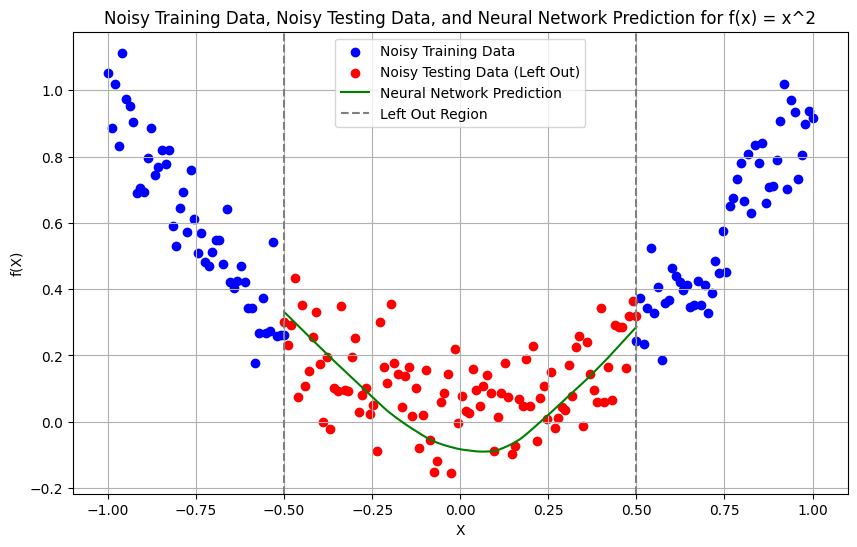

In [ ]:
#Neural network

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# Generate training data for the 1D function f(x) = x^2 with noise, excluding the range -0.5 ≤ x ≤ 0.5
X_train_1d = np.concatenate([np.linspace(-1, -0.5, 50), np.linspace(0.5, 1, 50)]).reshape(-1, 1)
y_train_1d = X_train_1d ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_1d), 1)
y_train_1d_with_noise = y_train_1d + noise_train

# Generate test data for the same function (within the range -0.5 ≤ x ≤ 0.5) with noise
X_test_1d = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_test_1d = X_test_1d ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_1d), 1)
y_test_1d_with_noise = y_test_1d + noise_test

# Create a simple feedforward neural network using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with noisy training data
model.fit(X_train_1d, y_train_1d_with_noise, epochs=100, verbose=0)

# Make predictions using the trained neural network
y_pred_nn = model.predict(X_test_1d)

# Calculate MSE
mse_nn = mean_squared_error(y_test_1d_with_noise, y_pred_nn)
print("MSE for Neural Network with noisy data:", mse_nn)

# Plot the noisy training and testing data, and neural network prediction
plt.figure(figsize=(10, 6))
plt.scatter(X_train_1d, y_train_1d_with_noise, label='Noisy Training Data', color='blue')
plt.scatter(X_test_1d, y_test_1d_with_noise, label='Noisy Testing Data (Left Out)', color='red')
plt.plot(X_test_1d, y_pred_nn, label='Neural Network Prediction', color='green')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Noisy Training Data, Noisy Testing Data, and Neural Network Prediction for f(x) = x^2')
plt.axvline(x=-0.5, color='gray', linestyle='--', label='Left Out Region')
plt.axvline(x=0.5, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#improved neural network

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# Generate training data for the 1D function f(x) = x^2 with noise, excluding the range -0.5 ≤ x ≤ 0.5
X_train_1d = np.concatenate([np.linspace(-1, -0.5, 50), np.linspace(0.5, 1, 50)]).reshape(-1, 1)
y_train_1d = X_train_1d ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_1d), 1)
y_train_1d_with_noise = y_train_1d + noise_train

# Generate test data for the same function (within the range -0.5 ≤ x ≤ 0.5) with noise
X_test_1d = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_test_1d = X_test_1d ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_1d), 1)
y_test_1d_with_noise = y_test_1d + noise_test

# Create a simple feedforward neural network using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with noisy training data
model.fit(X_train_1d, y_train_1d_with_noise, epochs=100, verbose=0)

# Make predictions using the trained neural network
y_pred_nn = model.predict(X_test_1d)

# Calculate MSE
mse_nn = mean_squared_error(y_test_1d_with_noise, y_pred_nn)
print("MSE for Neural Network with noisy data:", mse_nn)

# Plot the noisy training and testing data, and neural network prediction
plt.figure(figsize=(10, 6))
plt.scatter(X_train_1d, y_train_1d_with_noise, label='Noisy Training Data', color='blue')
plt.scatter(X_test_1d, y_test_1d_with_noise, label='Noisy Testing Data (Left Out)', color='red')
plt.plot(X_test_1d, y_pred_nn, label='Neural Network Prediction', color='green')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Noisy Training Data, Noisy Testing Data, and Neural Network Prediction for f(x) = x^2')
plt.axvline(x=-0.5, color='gray', linestyle='--', label='Left Out Region')
plt.axvline(x=0.5, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


4/4 [==============================] - 0s 2ms/step
MSE for Neural Network with noisy data: 0.00896903661933042


MSE for Gaussian Process Regression with noisy data: 0.01994909729721204


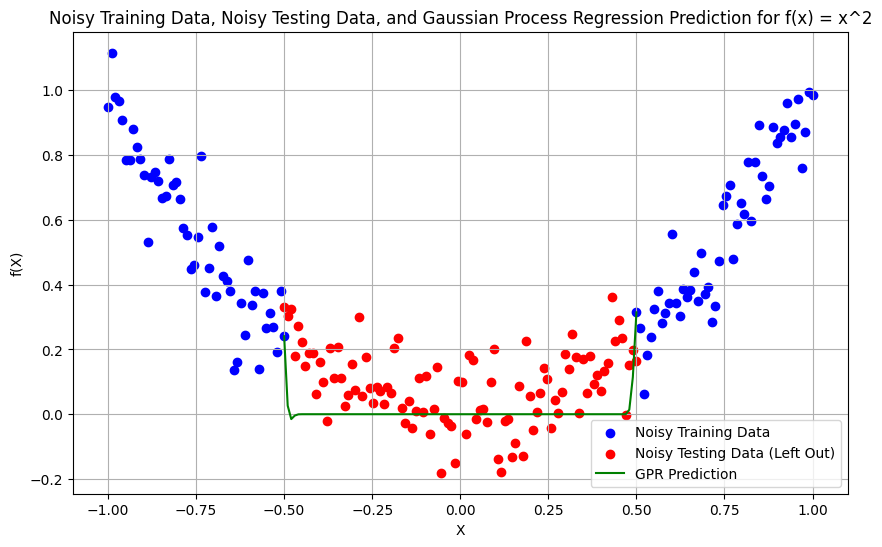

In [ ]:
#Gaussian

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error

# Generate training data for the 1D function f(x) = x^2 with noise, excluding the range -0.5 ≤ x ≤ 0.5
X_train_1d = np.concatenate([np.linspace(-1, -0.5, 50), np.linspace(0.5, 1, 50)]).reshape(-1, 1)
y_train_1d = X_train_1d ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_1d), 1)
y_train_1d_with_noise = y_train_1d + noise_train

# Generate test data for the same function (within the range -0.5 ≤ x ≤ 0.5) with noise
X_test_1d = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_test_1d = X_test_1d ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_1d), 1)
y_test_1d_with_noise = y_test_1d + noise_test

# Create and fit a Gaussian Process Regression (GPR) model with RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
gpr_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr_model.fit(X_train_1d, y_train_1d_with_noise)

# Predict using GPR
y_pred_gpr, std_dev = gpr_model.predict(X_test_1d, return_std=True)

# Calculate MSE
mse_gpr = mean_squared_error(y_test_1d_with_noise, y_pred_gpr)
print("MSE for Gaussian Process Regression with noisy data:", mse_gpr)

# Plot the noisy training and testing data, and GPR prediction
plt.figure(figsize=(10, 6))
plt.scatter(X_train_1d, y_train_1d_with_noise, label='Noisy Training Data', color='blue')
plt.scatter(X_test_1d, y_test_1d_with_noise, label='Noisy Testing Data (Left Out)', color='red')
plt.plot(X_test_1d, y_pred_gpr, label='GPR Prediction', color='green')
#plt.fill_between(X_test_1d.ravel(), (y_pred_gpr - std_dev).ravel(), (y_pred_gpr + std_dev).ravel(), color='lightgray', alpha=0.6)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Noisy Training Data, Noisy Testing Data, and Gaussian Process Regression Prediction for f(x) = x^2')
#plt.axvline(x=-0.5, color='gray', linestyle='--', label='Left Out Region')
# plt.axvline(x=0.5, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


MSE for Gaussian Process Regression with noisy data: 0.009979820898025045


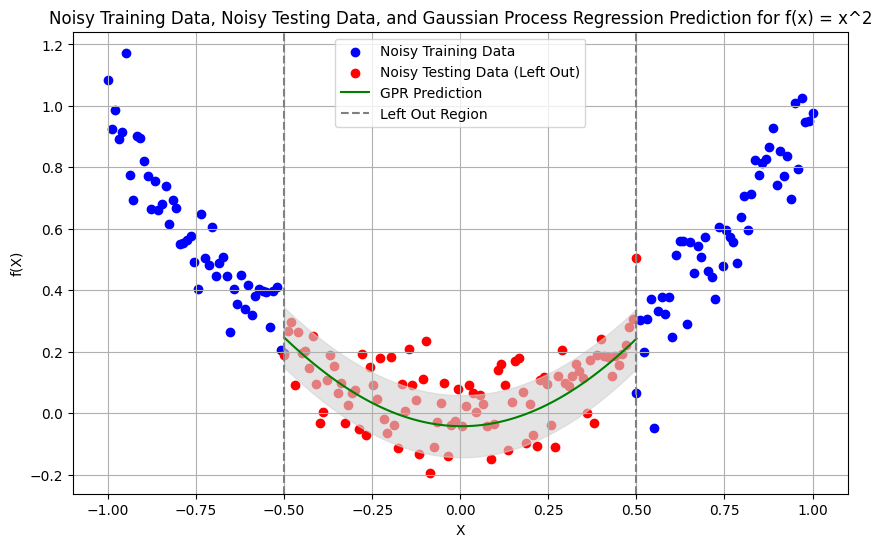

In [ ]:
#Improved Gaussian

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error

# Generate training data for the 1D function f(x) = x^2 with noise, excluding the range -0.5 ≤ x ≤ 0.5
X_train_1d = np.concatenate([np.linspace(-1, -0.5, 50), np.linspace(0.5, 1, 50)]).reshape(-1, 1)
y_train_1d = X_train_1d ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_1d), 1)
y_train_1d_with_noise = y_train_1d + noise_train

# Generate test data for the same function (within the range -0.5 ≤ x ≤ 0.5) with noise
X_test_1d = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_test_1d = X_test_1d ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_1d), 1)
y_test_1d_with_noise = y_test_1d + noise_test

# Create and fit a Gaussian Process Regression (GPR) model with RBF kernel and WhiteKernel for regularization
kernel = 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1e-5)
gpr_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr_model.fit(X_train_1d, y_train_1d_with_noise)

# Predict using GPR
y_pred_gpr, std_dev = gpr_model.predict(X_test_1d, return_std=True)

# Calculate MSE
mse_gpr = mean_squared_error(y_test_1d_with_noise, y_pred_gpr)
print("MSE for Gaussian Process Regression with noisy data:", mse_gpr)

# Plot the noisy training and testing data, and GPR prediction
plt.figure(figsize=(10, 6))
plt.scatter(X_train_1d, y_train_1d_with_noise, label='Noisy Training Data', color='blue')
plt.scatter(X_test_1d, y_test_1d_with_noise, label='Noisy Testing Data (Left Out)', color='red')
plt.plot(X_test_1d, y_pred_gpr, label='GPR Prediction', color='green')
plt.fill_between(X_test_1d.ravel(), (y_pred_gpr - std_dev).ravel(), (y_pred_gpr + std_dev).ravel(), color='lightgray', alpha=0.6)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Noisy Training Data, Noisy Testing Data, and Gaussian Process Regression Prediction for f(x) = x^2')
plt.axvline(x=-0.5, color='gray', linestyle='--', label='Left Out Region')
plt.axvline(x=0.5, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()
